In [12]:
import numpy as np
from scipy import sparse
import os
import time

In [2]:
# change the directory to the root folder
os.chdir(os.path.dirname(os.getcwd()))

In [9]:
# load custom modules and keep them updated
%load_ext autoreload
%autoreload 2
from src.common.utils import save_model, load_model, save_cv_results, load_cv_results, plot_leanring_curve, save_plot, save_metrics, load_metrics,format_cv_results, plot_complexity_curve
from src.dataset1_tabular.models import KNNModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# load data
X_train = sparse.load_npz('data/dataset1/processed/X_train.npz')
X_test = sparse.load_npz('data/dataset1/processed/X_test.npz')
y_train = np.load('data/dataset1/processed/y_train.npy')
y_test = np.load('data/dataset1/processed/y_test.npy')

print(f'The shape of X train: {X_train.shape}')
print(f'the shape of X test: {X_test.shape}')

The shape of X train: (32950, 67)
the shape of X test: (8238, 67)


# KNN Train

In [5]:
dataset = 'dataset1'
model_name = 'knn'

## Hyperparameter tuning

In [ ]:
# KNN model
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNNModel(X_train, y_train,X_test, y_test,cv=5,param_grid=param_grid)

# trian the model
knn.train()

In [ ]:
# save model
save_model(knn.best_model, 'results/model_outputs', model_name, dataset)
# save cv results
save_cv_results(knn.cv_results, 'results/model_outputs', model_name, dataset)

In [ ]:
eval_results = knn.evaluate()
save_metrics(eval_results, 'results/model_outputs', model_name, dataset)

# Analaysis

## Best Model

In [6]:
best_model = load_model('results/model_outputs', model_name, dataset)
metrics = load_metrics('results/model_outputs', model_name, dataset)

print(f'the best model params: {best_model.get_params()}')
print(f'the metrics of testing dataset: {metrics}')

Model loaded successfully from results/model_outputs/knn_dataset1.joblib
Metrics loaded successfully from results/model_outputs/knn_dataset1_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
the metrics of testing dataset: {'accuracy': 0.902889050740471, 'precision': 0.6588486140724946, 'recall': 0.3256059009483667, 'f1': 0.43582510578279265}


## Learning Curve and Fit time

In [7]:
# load the best model
best_model = load_model('results/model_outputs', 'knn', 'dataset1')

Model loaded successfully from results/model_outputs/knn_dataset1.joblib


[learning_curve] Training set sizes: [  263  2636  5272 10544 15816 21088 26360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  35 | elapsed:  2.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  5.8min finished


Plot saved successfully at results/figures/knn_learning_curve_dataset1.png
Plot saved successfully at results/figures/knn_fit_time_dataset1.png


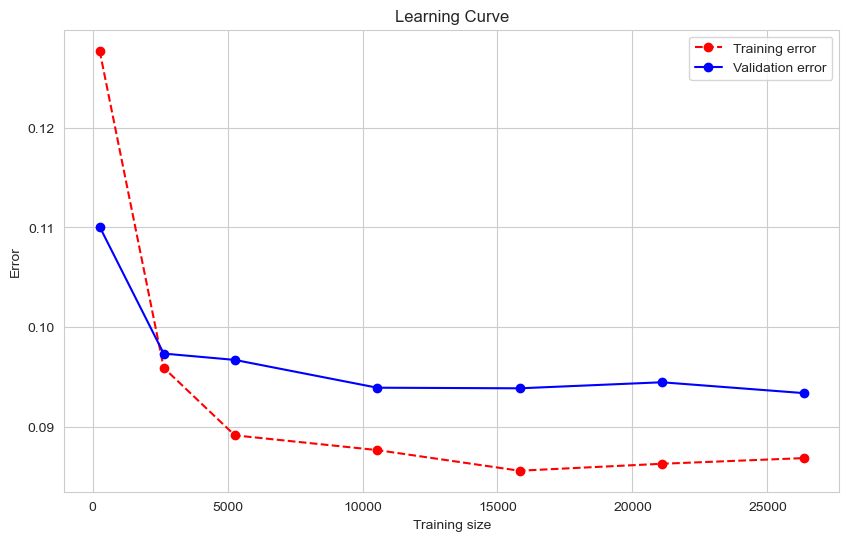

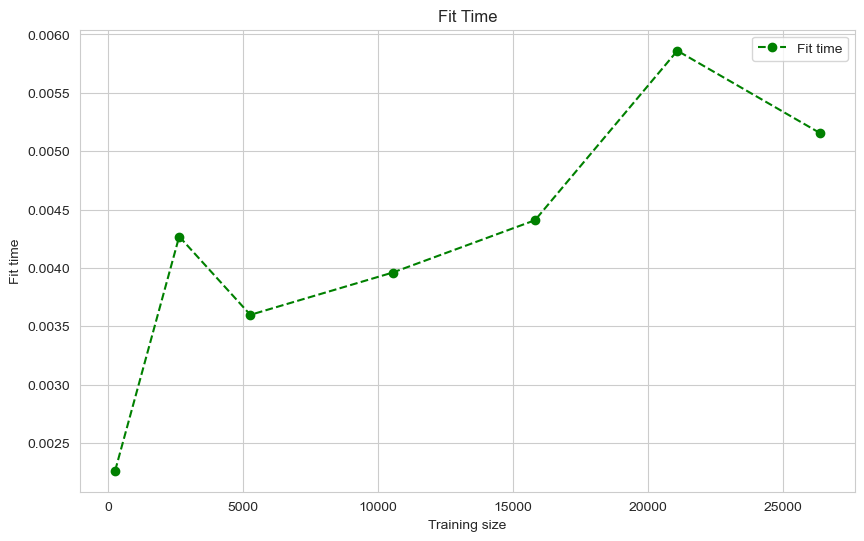

In [10]:
lc_plt, fit_plt = plot_leanring_curve(best_model, X_train, y_train, cv = 5, train_size=[0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1])
save_plot(lc_plt, 'results/figures', 'knn','learning_curve', 'dataset1')
save_plot(fit_plt, 'results/figures', 'knn','fit_time', 'dataset1')

## Complexity plot

In [40]:
cv_results = load_cv_results('results/model_outputs', 'knn', 'dataset1')

Cross-validation results loaded successfully from results/model_outputs/knn_dataset1_cv_results.pkl


In [41]:
cv_results_df = format_cv_results(cv_results)
cv_results_df

,metric,n_neighbors,weights,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,mean_train_score,std_train_score,mean_train_error,mean_test_error
0,euclidean,5,uniform,0.008436,0.004002,43.717527,0.405962,0.900577,0.001894,0.929545,0.000808,0.070455,0.099423
1,euclidean,5,distance,0.004576,0.001864,43.619618,0.077451,0.898816,0.001884,1.000000,0.000000,0.000000,0.101184
2,euclidean,10,uniform,0.005011,0.001671,43.440296,0.299654,0.904036,0.001507,0.917883,0.001018,0.082117,0.095964
3,euclidean,10,distance,0.004781,0.001440,43.310139,0.304191,0.902792,0.001406,1.000000,0.000000,0.000000,0.097208
4,euclidean,15,uniform,0.005357,0.001373,43.298029,0.461585,0.905827,0.001023,0.916578,0.000729,0.083422,0.094173
5,euclidean,15,distance,0.009846,0.007805,43.065266,0.476719,0.904977,0.000902,1.000000,0.000000,0.000000,0.095023
6,euclidean,20,uniform,0.008244,0.002953,43.639077,0.318665,0.906646,0.001569,0.913171,0.000894,0.086829,0.093354
7,euclidean,20,distance,0.007160,0.003254,43.589567,0.358414,0.906131,0.001224,1.000000,0.000000,0.000000,0.093869
8,euclidean,25,uniform,0.008716,0.003180,39.782448,0.069857,0.906100,0.001715,0.912974,0.000799,0.087026,0.093900
9,euclidean,25,distance,0.006616,0.000996,39.713492,0.064772,0.905979,0.001756,1.000000,0.000000,0.000000,0.094021


In [42]:
weight_list = cv_results['param_weights']


Plot saved successfully at results/figures/knn_complexity_curve_euclidean_uniform_dataset1.png
Plot saved successfully at results/figures/knn_complexity_curve_manhattan_uniform_dataset1.png
Plot saved successfully at results/figures/knn_complexity_curve_euclidean_distance_dataset1.png
Plot saved successfully at results/figures/knn_complexity_curve_manhattan_distance_dataset1.png


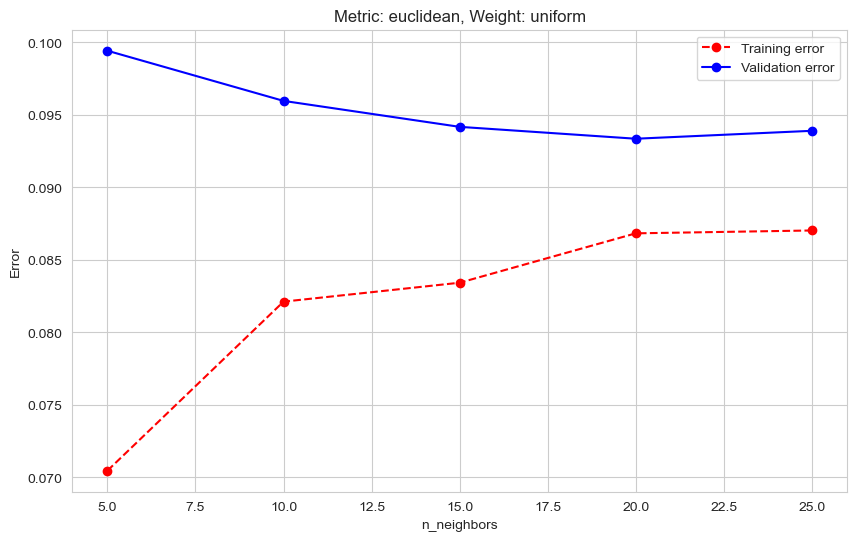

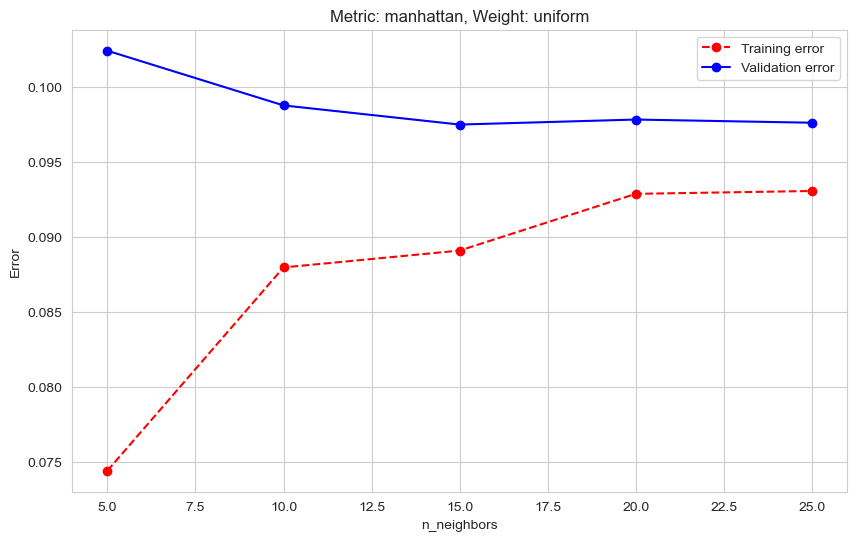

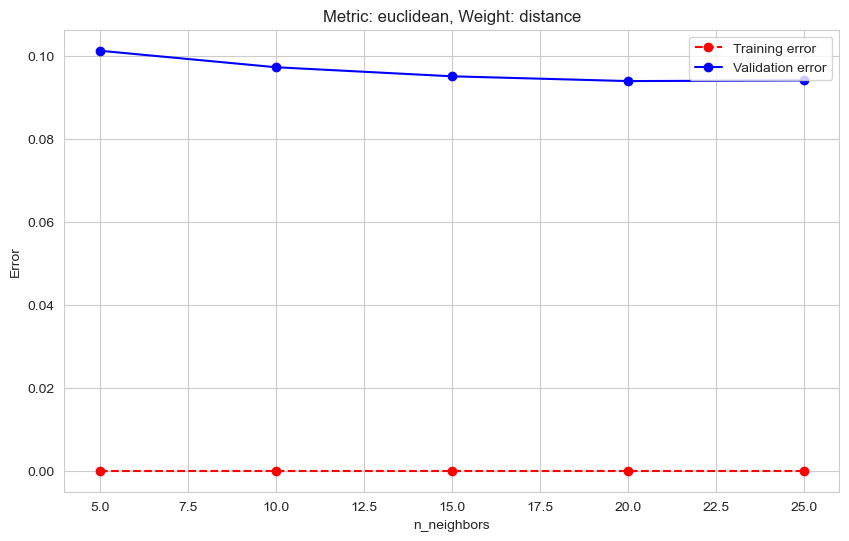

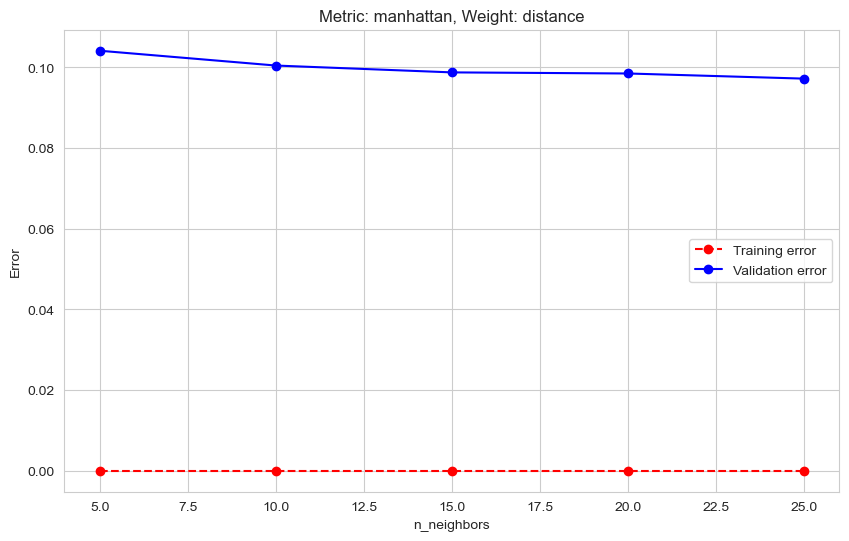

In [46]:
for weight in cv_results_df['weights'].unique():
    for metric in cv_results_df['metric'].unique():
        title = f'Metric: {metric}, Weight: {weight}'
        sub_df = cv_results_df[(cv_results_df['metric'] == metric) & (cv_results_df['weights']==weight)]
        plt = plot_complexity_curve(sub_df, x_axis='n_neighbors', title=title)
        # save
        plot_name = f'complexity_curve_{metric}_{weight}'
        save_plot(plt, 'results/figures', model_name, plot_name, dataset)